# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [56]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [57]:
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
responses = []

# Get weather data
print("Beginning Data Retrieval")
print("---------------------------------")

city_counter = 1
set_counter = 1

for i, city in enumerate(cities):
    if (i%50 == 0 and i>= 50):
        set_counter += 1
        city_counter = 0
        
    city_url = url + "&q=" + city    
    print("Processing Record %s of Set %s | %s" % (city_counter, set_counter, city)) 
    city_counter += 1
       
    try:
        response = requests.get(city_url).json()
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        dates = response["dt"]
        country = response["sys"]["country"]
        
        responses.append({"City": city, "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Humidity":humidity,
                          "Cloudiness":cloudiness, "Wind Speed":wind_speed, "Date":dates, "Country":country})
               
        
    except:
        print(f"City not found. Skipping...")
        pass
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Beginning Data Retrieval
---------------------------------
Processing Record 1 of Set 1 | boa vista
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | pangody
Processing Record 4 of Set 1 | kerema
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | eureka
Processing Record 7 of Set 1 | mount isa
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | viedma
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | pontian kecil
Processing Record 12 of Set 1 | chipinge
Processing Record 13 of Set 1 | srednekolymsk
Processing Record 14 of Set 1 | kangaatsiaq
Processing Record 15 of Set 1 | kedrovyy
Processing Record 16 of Set 1 | katima mulilo
Processing Record 17 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | half moon bay
Processing Record 20 of Set 1 | pevek
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | catamar

Processing Record 38 of Set 4 | yicheng
Processing Record 39 of Set 4 | turhal
Processing Record 40 of Set 4 | ostrovnoy
Processing Record 41 of Set 4 | lorengau
Processing Record 42 of Set 4 | bethel
Processing Record 43 of Set 4 | wakefield
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | morehead
Processing Record 46 of Set 4 | clyde river
Processing Record 47 of Set 4 | mitsamiouli
Processing Record 48 of Set 4 | galesong
Processing Record 49 of Set 4 | faanui
Processing Record 0 of Set 5 | mar del plata
Processing Record 1 of Set 5 | vagur
Processing Record 2 of Set 5 | rio grande
Processing Record 3 of Set 5 | manta
Processing Record 4 of Set 5 | vestmannaeyjar
Processing Record 5 of Set 5 | nuuk
Processing Record 6 of Set 5 | verkhneyarkeyevo
Processing Record 7 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 8 of Set 5 | bhandara
Processing Record 9 of Set 5 | bouna
Processing Record 10 of Set 5 | piacabucu
Processing Record 11 of

Processing Record 27 of Set 8 | pauini
Processing Record 28 of Set 8 | rocha
Processing Record 29 of Set 8 | geresk
City not found. Skipping...
Processing Record 30 of Set 8 | ningbo
Processing Record 31 of Set 8 | sayan
Processing Record 32 of Set 8 | tsiroanomandidy
Processing Record 33 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 34 of Set 8 | ongandjera
Processing Record 35 of Set 8 | shaowu
Processing Record 36 of Set 8 | montepuez
Processing Record 37 of Set 8 | gravdal
Processing Record 38 of Set 8 | san patricio
Processing Record 39 of Set 8 | vao
Processing Record 40 of Set 8 | yerbogachen
Processing Record 41 of Set 8 | kushmurun
Processing Record 42 of Set 8 | witu
Processing Record 43 of Set 8 | ochamchira
Processing Record 44 of Set 8 | murdochville
Processing Record 45 of Set 8 | chuy
Processing Record 46 of Set 8 | dunmore town
Processing Record 47 of Set 8 | los llanos de aridane
Processing Record 48 of Set 8 | behbahan
Processing Record 49 of 

Processing Record 14 of Set 12 | inhambane
Processing Record 15 of Set 12 | logan
Processing Record 16 of Set 12 | paramonga
Processing Record 17 of Set 12 | shache
Processing Record 18 of Set 12 | sukhumi
Processing Record 19 of Set 12 | gbarnga
Processing Record 20 of Set 12 | beaverlodge
Processing Record 21 of Set 12 | dongsheng
Processing Record 22 of Set 12 | malaya serdoba
Processing Record 23 of Set 12 | upata
Processing Record 24 of Set 12 | villa maria
Processing Record 25 of Set 12 | mandera
Processing Record 26 of Set 12 | beringovskiy
Processing Record 27 of Set 12 | nishihara
Processing Record 28 of Set 12 | kushima
Processing Record 29 of Set 12 | chaihe
Processing Record 30 of Set 12 | leshukonskoye
Processing Record 31 of Set 12 | potosi
Processing Record 32 of Set 12 | vung tau
Processing Record 33 of Set 12 | gorontalo
Processing Record 34 of Set 12 | pokhara
Processing Record 35 of Set 12 | aquiraz
Processing Record 36 of Set 12 | lae
Processing Record 37 of Set 12 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [58]:
cities_df = pd.DataFrame(responses, columns=["City","Lat","Lng","Max Temp","Humidity",
                                             "Cloudiness","Wind Speed","Date","Country"])
#convert date from int64 to datetime format
cities_df['Date'] = pd.to_datetime(cities_df['Date'])
#remove unnecessary sec, min, hours
cities_df = cities_df.assign(Date = lambda x: pd.to_datetime(x['Date'].dt.strftime('%Y-%m-%d')))
cities_df.to_csv('output.csv', index=True)


In [62]:
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
0,boa vista,2.8197,-60.6733,73.38,94,75,8.05,1970-01-01,BR
1,tuktoyaktuk,69.4541,-133.0374,68.00,64,75,13.80,1970-01-01,CA
2,pangody,65.8500,74.4859,62.37,57,100,9.51,1970-01-01,RU
3,kerema,-7.9631,145.7785,76.57,83,94,4.94,1970-01-01,PG
4,saskylakh,71.9167,114.0833,68.20,44,0,7.49,1970-01-01,RU


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [63]:
cities_df['Humidity'].describe()

count    570.000000
mean      67.415789
std       21.967081
min        8.000000
25%       53.000000
50%       72.000000
75%       84.750000
max      100.000000
Name: Humidity, dtype: float64

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

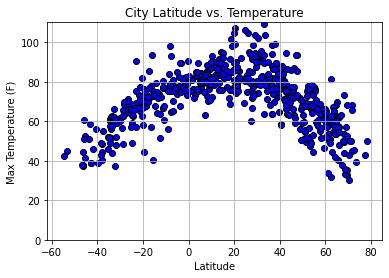

In [67]:
"""This plot looks at the relationship between temperature and latitude. It appears that the latitude range from 0 to 40 has
the highest temperature"""

x_axis = cities_df['Lat']
y_axis = cities_df['Max Temp']

#make a scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,110)

# Set the upper and lower limits of our x axis
plt.xlim(-62,85)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("lat_temp_plot.png")



## Latitude vs. Humidity Plot

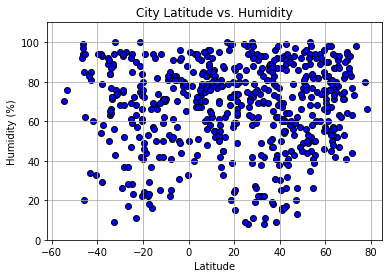

In [68]:
"""This plot shows the relationship between humidity and latitude. The humidity range fluctuates greatly across all latitudes"""

x_axis = cities_df['Lat']
y_axis = cities_df['Humidity']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,110)

# Set the upper and lower limits of our x axis
plt.xlim(-62,85)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("lat_humidity.png")

## Latitude vs. Cloudiness Plot

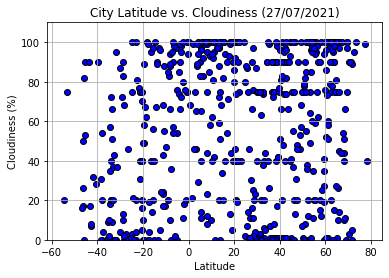

In [69]:
"""The humidity rate is very scattered across all latitude and it seems there is no significant difference with latitude"""

x_axis = cities_df['Lat']
y_axis = cities_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,110)

# Set the upper and lower limits of our x axis
plt.xlim(-62,85)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness (27/07/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("lat_cloudiness.png")

## Latitude vs. Wind Speed Plot

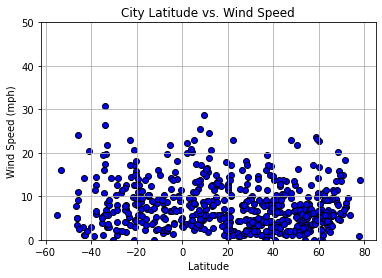

In [70]:
"""Wind speed seems rather stable through entire latitude, however it might be that wind speed is often lower at latitudes
above 20 since the points are denser in that region"""

x_axis = cities_df['Lat']
y_axis = cities_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,50)

# Set the upper and lower limits of our x axis
plt.xlim(-62,85)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("lat_windspeed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:0.47951711678329134


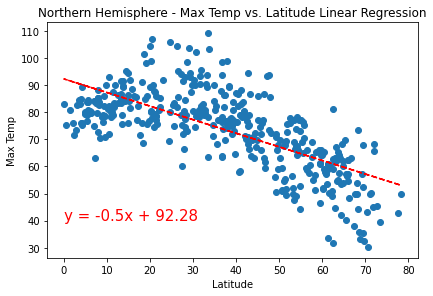

In [72]:
"""The following linear regression trend for northern hemisphere clearly shows the downward trend of temperature with latitude.
This makes sense as low latitude northern countries are cold countries in north pole such as Norway, Finland, Northwest territories 
of Canada, Russia etc"""

# define northern and southern hemispheres to use for regression analysis
northern_hem_df = cities_df[cities_df['Lat'] >= 0]
southern_hem_df = cities_df[cities_df['Lat'] < 0]

x_axis = northern_hem_df['Lat']
y_axis = northern_hem_df['Max Temp']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is:{rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,40),fontsize=15,color="red")

plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6220303791491909


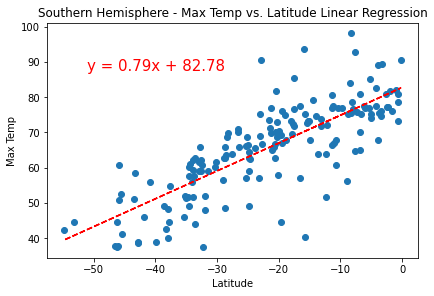

In [73]:
"""In southern hemisphere we observe that temperature increases as latitude increase from negative towards zero.
This makes sense because temperature is much lower in south pole"""

x_axis = southern_hem_df['Lat']
y_axis = southern_hem_df['Max Temp']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.2, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00041356078713175614


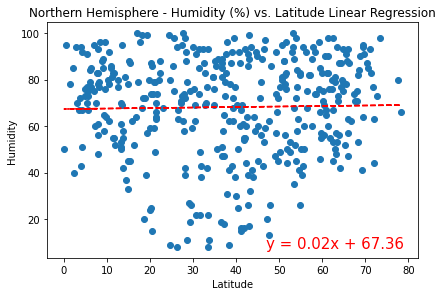

In [74]:
"""There is a very minor correlation in humidity versus latitude as data are very scattered. However, the trendline suggests
 very small decline in humidity as latitude increases"""

x_axis = northern_hem_df['Lat']
y_axis = northern_hem_df['Humidity']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.6, .2), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.01031687932306832


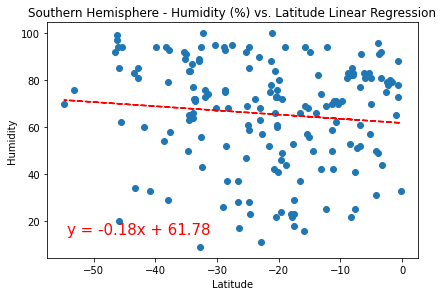

In [76]:
"""Compared to northern hemisphere, in southern hemisphere there is a better correlation of humidity decrease with increase of 
latitude. The data is still widely scattered"""

x_axis = southern_hem_df['Lat']
y_axis = southern_hem_df['Humidity']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.15, .25), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.003651643461907175


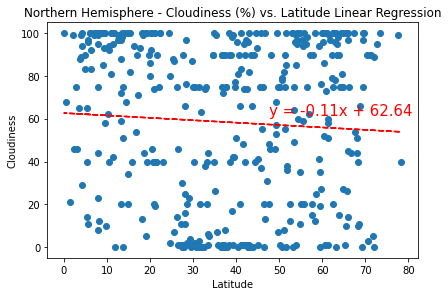

In [78]:
"""There is no clear difference in cloudiness with change of latitude in norhtern hemisphere"""

x_axis = northern_hem_df['Lat']
y_axis = northern_hem_df['Cloudiness']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.6, .65), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11783216146650885


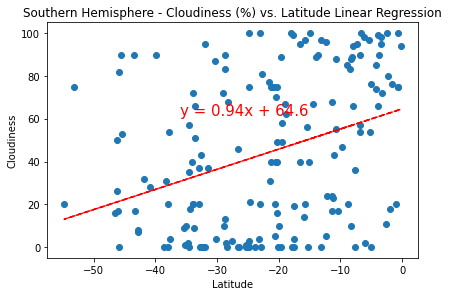

In [79]:
"""In southern hemisphere there is a clear evidence that cloudiness increased with higher latitude, with denser scatter points
at higher latitudes"""

x_axis = southern_hem_df['Lat']
y_axis = southern_hem_df['Cloudiness']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.4, .65), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.015294514324820542


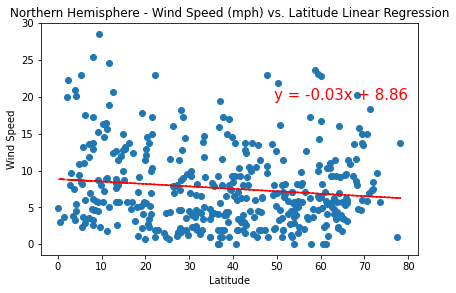

In [80]:
"""The wind speed shows very minor reduction with increase of latitude in northern hemisphere"""

x_axis = northern_hem_df['Lat']
y_axis = northern_hem_df['Wind Speed']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.6, .7), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0016173973420526978


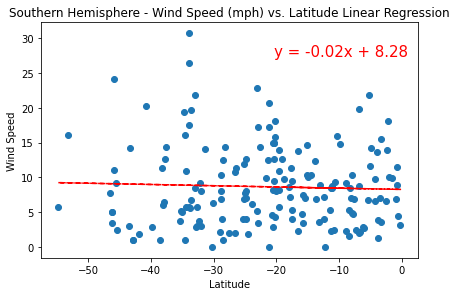

In [81]:
"""There is no clear indications of wind speed change with increase of latitude in southern hemisphere"""

x_axis = southern_hem_df['Lat']
y_axis = southern_hem_df['Wind Speed']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.6, .85), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

plt.show()